# 4ERP-BI 2  / GROUPE 6 / DATA   A6 
### EYA NASRI
### CHADHA MOUELHI
### AZIZ ALLOUCH
### EYA JDIR
### MARIEM KHATAT
### EMNA KTATA

# Résumé du travail

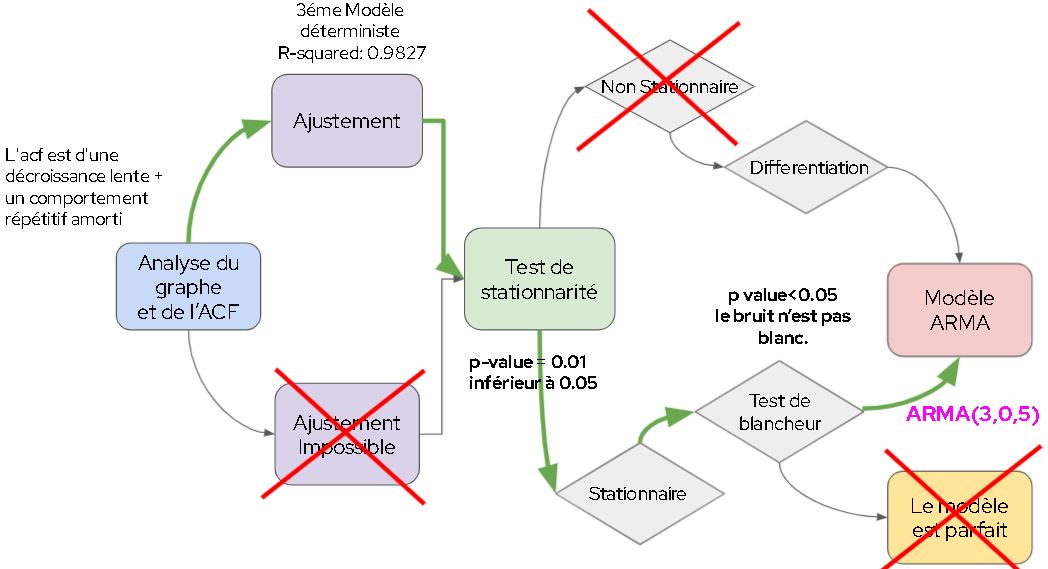

# Etude graphique des données  
On s'intéresse aux données décrivant le volume de ventes de  Beer, Wine, et Liquor Stores en US 
Il s'agit d'une série d'observations de fréquence mensuelle qui s'étale du mois Janvier 1994 au Décembre 2019.

In [75]:
# suppress conflict warnings at package load
library(dplyr, warn.conflicts=FALSE)

# suppress startup messages at package load
suppressPackageStartupMessages(library(tidyverse))

# suppress warnings
suppressWarnings( as.numeric(c('0', '1', '2', 'three')) )


[1]  0  1  2 NA

## Chargement des données

In [76]:
sp.data<-read.table("C:/Users/eyanasri/Desktop/serie tempo/A6.txt")
class(sp.data)

# les données sont de type data.frame, on les transforme sous la classe ts

[1] "data.frame"

In [77]:
# en indiquant la période de l'étude via la préision de start et freq (on peut
# aussi préciser la date de la fin : end).
sp.ts<-ts(sp.data, start = c(1994, 1),end=c(2019, 12),freq = 12)

## Exploration graphique des données

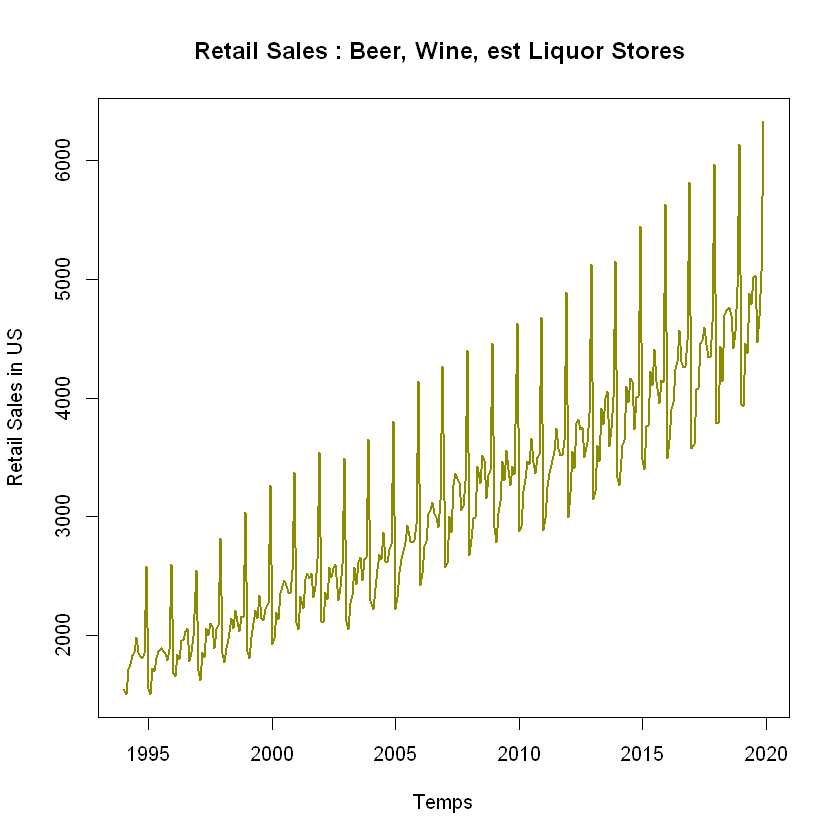

In [78]:
plot(sp.ts, xlab="Temps", ylab="Retail Sales in US",
     main="Retail Sales : Beer, Wine, est Liquor Stores ",
     col="yellow4",lwd=2)

A travers la représentation graphique des données à étudier, on remarque la présence d'une tendance et d'une saisonnalité. Pour s'assurer de ce qu'on a observé, on examine la fonction d'autocorrelation `acf`.

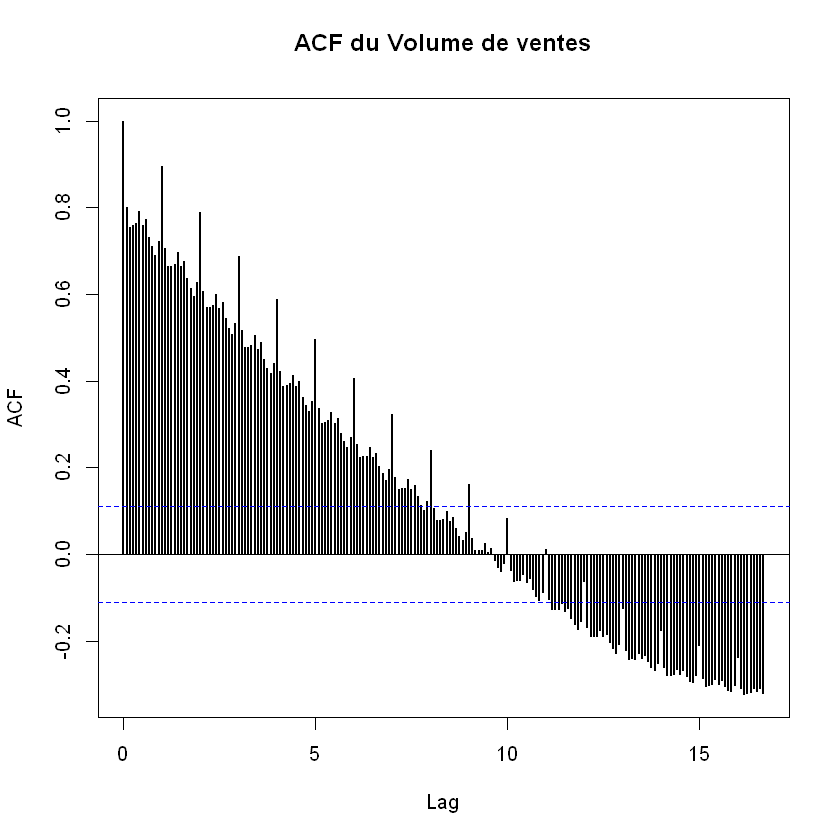

In [79]:
acf(sp.ts,lag=200,main="ACF du Volume de ventes",lwd=2)

L'acf est d'une décroissance lente cequi confirme notre hypothèse de présence de tendance aussi bien l'acf présente un comportement répétitif amorti ce qui nous informe sur la présence d'une saisonnalité. 

# Modélisation des données  
On considère que notre ST s'écrit sous la forme suivante :  
$$y_t=f(t;\Lambda)+\varepsilon_t, \quad t\in T$$
avec :  
- $f(t;\Lambda)$ désigne la composante déterministe avec un vecteur de aparamètres $\Lambda$  
- $\varepsilon_t$ désigne la composante stochastique  

## Modélisation de la composante déterministe  
Dans cet exemple, la composante déterministe inclut la composante tendance et saisonnière.

### La composante tendance    
Pour avoir une idée sur le comportement de la tendance, on va tracer le résulat de la décomposition additive (le choix de cette décoposition est justifié par le fait que les amplitudes des données sont plus ou moins constantes sinon pour un modèle multiplicatif, nous pouvons appliquer la fonction logarithme sur les données pour réduire leurs variabilités).

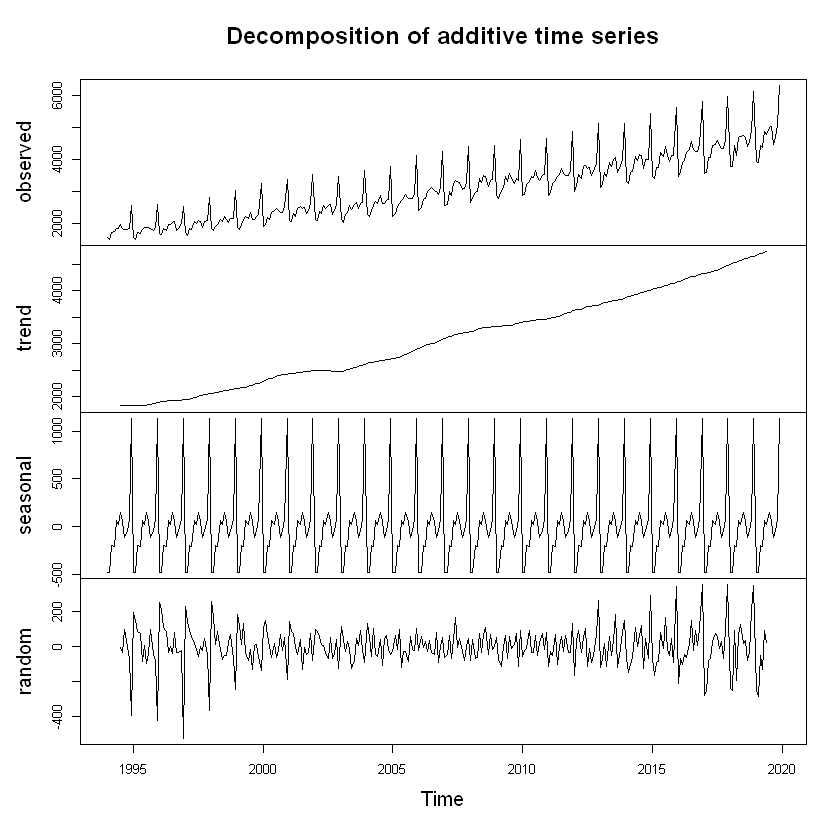

In [80]:
plot(decompose(sp.ts,type=c("additive")))

La sortie de la fonction `decompose` par rapport au trend (via une moyenne mobile) nous pousse  à choisir un modèle polynomial d'ordre 1 ou 2.  
 nous pouvons aller au delà de l'ordre 3 et considérer le modèle qui retourne la plus petite valeur du critère AIC ou BIC ou encore la valeur la plus élevée du coefficient $R^2$ ajusté.  


### La composante saisonnière  
Une première façon pour estimer la composante saisonnière pour une période $T=12$ est de l'exprimer sous cette forme :
$$s(t;\theta)=\sum_{i=1}^{\frac{T}{2}}\beta_i\cos{(\frac{2\pi i}{T}t)}+\gamma_i\sin{(\frac{2\pi i}{T}t)},\ t\in\mathbb{N}$$
où $\theta=[\beta_1,\cdots,\beta_{\frac{T}{2}},\gamma_1,\cdots,\gamma_{\frac{T}{2}}]$.  

Le vecteur de paramètres $\theta$ ainsi que les paramètres du modèle polynomial considéré pour la modélisation de la tendance seront estimés par la méthode des moindres carrés via la fonction `lm`.  
  
Une deuxième façon pour estimer la composante saisonnière est d'utiliser les variable dummy. Pour une période $T$, on aura $T$ variables dummy dont la ième contient des zéros partout sauf pour les valeurs associées à l'idice i de chaque période, elle prend 1. Les $T$ variables dummy correspondent à des variables descriptives dont l'ajustement se fera aussi par la fonction `lm`.

In [81]:
# Détermination de la variable descriptive liée à la composante tendance

t<-c(1:length(sp.ts))
s.t<-(t-mean(t))/sd(t) # cette variable est introduite afin de guarantir un 
                       #même ordre de grandeur des différentes variables descritptives

# Détermination des variables descriptives liées à la composante saisonnière

CS<-matrix(0,length(sp.ts),6)
SN<-matrix(0,length(sp.ts),6)
for (i in 1:6) CS[,i]<-cos(2*pi*i*t/12)
for (i in 1:6) SN[,i]<-sin(2*pi*i*t/12) # on peut s'arrêter à 6 vu que la 7ème variable est nulle.

### Modèle déterministe 1 :  
$$f(t;\Lambda)=\alpha_0+\alpha_1 t + \sum_{i=1}^{6}\beta_i\cos{(\frac{2\pi i}{12}t)}+\gamma_i\sin{(\frac{2\pi i}{12}t)}$$  
avec $\Lambda=[\alpha_0,\alpha_1,\beta_1,\cdots,\beta_{6},\gamma_1,\cdots,\gamma_{6}].$

In [82]:
Model1<-lm(sp.ts~s.t+CS+SN)
summary(Model1)


Call:
lm(formula = sp.ts ~ s.t + CS + SN)

Residuals:
    Min      1Q  Median      3Q     Max 
-517.12 -100.19  -12.65   73.77  558.99 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.101e+03  8.743e+00 354.726  < 2e-16 ***
s.t          8.825e+02  8.761e+00 100.731  < 2e-16 ***
CS1          7.009e+01  1.236e+01   5.670 3.38e-08 ***
CS2          2.888e+02  1.237e+01  23.354  < 2e-16 ***
CS3          2.477e+02  1.236e+01  20.032  < 2e-16 ***
CS4          2.117e+02  1.236e+01  17.125  < 2e-16 ***
CS5          2.420e+02  1.237e+01  19.567  < 2e-16 ***
CS6          8.079e+01  9.946e+00   8.123 1.22e-14 ***
SN1         -1.640e+02  1.237e+01 -13.264  < 2e-16 ***
SN2         -8.941e+01  1.236e+01  -7.232 4.04e-12 ***
SN3         -9.539e+01  1.236e+01  -7.716 1.82e-13 ***
SN4         -4.291e+01  1.237e+01  -3.469 0.000599 ***
SN5          3.569e+01  1.236e+01   2.887 0.004175 ** 
SN6         -1.440e+14  2.319e+14  -0.621 0.535220    
---
Signif. codes:  0 '

### Modèle déterministe 2 :  
$$f(t;\Lambda)=\alpha_0+\alpha_1 t +\alpha_2 t^2+ \sum_{i=1}^{6}\beta_i\cos{(\frac{2\pi i}{12}t)}+\gamma_i\sin{(\frac{2\pi i}{12}t)}$$  
avec $\Lambda=[\alpha_0,\alpha_1,\alpha_2,\beta_1,\cdots,\beta_{6},\gamma_1,\cdots,\gamma_{6}].$

In [83]:
Model2<-lm(sp.ts~s.t+I(s.t^2)+CS+SN)
summary(Model2)


Call:
lm(formula = sp.ts ~ s.t + I(s.t^2) + CS + SN)

Residuals:
    Min      1Q  Median      3Q     Max 
-588.18  -77.67    5.85   78.17  375.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.010e+03  1.104e+01 272.562  < 2e-16 ***
s.t          8.825e+02  7.374e+00 119.683  < 2e-16 ***
I(s.t^2)     9.179e+01  8.254e+00  11.121  < 2e-16 ***
CS1          6.988e+01  1.040e+01   6.716 9.52e-11 ***
CS2          2.889e+02  1.041e+01  27.754  < 2e-16 ***
CS3          2.476e+02  1.041e+01  23.792  < 2e-16 ***
CS4          2.117e+02  1.040e+01  20.346  < 2e-16 ***
CS5          2.421e+02  1.041e+01  23.257  < 2e-16 ***
CS6          7.952e+01  8.372e+00   9.497  < 2e-16 ***
SN1         -1.640e+02  1.041e+01 -15.763  < 2e-16 ***
SN2         -8.936e+01  1.041e+01  -8.587 5.10e-16 ***
SN3         -9.547e+01  1.040e+01  -9.175  < 2e-16 ***
SN4         -4.304e+01  1.041e+01  -4.134 4.63e-05 ***
SN5          3.562e+01  1.040e+01   3.424 0.000704 ***
SN6         

### Modèle déterministe 3 : 

In [84]:
Model3<-lm(sp.ts~s.t+I(s.t^2)+I(s.t^3)+CS+SN)
summary(Model3)


Call:
lm(formula = sp.ts ~ s.t + I(s.t^2) + I(s.t^3) + CS + SN)

Residuals:
    Min      1Q  Median      3Q     Max 
-588.16  -77.84    5.58   78.33  374.44 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.010e+03  1.106e+01 272.103  < 2e-16 ***
s.t          8.819e+02  1.847e+01  47.762  < 2e-16 ***
I(s.t^2)     9.179e+01  8.268e+00  11.102  < 2e-16 ***
I(s.t^3)     3.051e-01  9.442e+00   0.032 0.974246    
CS1          6.987e+01  1.042e+01   6.703 1.03e-10 ***
CS2          2.888e+02  1.043e+01  27.705  < 2e-16 ***
CS3          2.476e+02  1.042e+01  23.750  < 2e-16 ***
CS4          2.117e+02  1.042e+01  20.310  < 2e-16 ***
CS5          2.421e+02  1.043e+01  23.216  < 2e-16 ***
CS6          7.951e+01  8.387e+00   9.480  < 2e-16 ***
SN1         -1.640e+02  1.044e+01 -15.719  < 2e-16 ***
SN2         -8.935e+01  1.043e+01  -8.570 5.82e-16 ***
SN3         -9.546e+01  1.042e+01  -9.158  < 2e-16 ***
SN4         -4.304e+01  1.043e+01  -4.127 4.78e-05 ***
S

Selon les deux sorties, on remarque que le variable  SN6 n'est pas significtaive. sa statistique T observée est entre -1.96 et 1.96 et aussi les pvalues sont supérieures à 0.05. Donc nous pouvons l'éliminer. 

### Comparaison de modèles  
A  travers les résultats générés par l'ajustement des deux modèles on constate :  
1. Tous les paramètres, sauf ceux associés à  SN6, sont significatifs par un test d'hypothèse à 5% de risque : l'hypothèse alternative est considérée. La valeur de la statistique T observée est ou bien inférieure à -1.96 ou bien supérieure à 1.96. Nous pouvons aussi, décidé à travers les p values (<=0.05).  
  
  

2. La valeur du coefficient de détermination $R^2$ du 3ème modèle est supérieur à celle du  1er et 2eme  modèles . Ceci est normal vu qu'en augmentant l'ordre du modèle associé à la tendance et donc le nombre de variables descriptives, on explique mieux la variable à expliquer (sp.ts), ainsi la variance expliquée va s'approcher de la variance totale. Celà n'implique pas forcément que le modèle 3 est plus fiable que les autres  modèles .
Il nous faut un autre critère pour trancher. On examine alors le coefficient de détermination ajusté $R_a^2$ qui prend en considération le nombre de paramètre à estimer.  

  
3. Le coefficient de détermination ajusté $R_a^2$ du modèle 3 est bien supérieur à celui des autres. On confirme alors que le modèle 3 est plus adéquat.  
 
   
4. Nous pouvons également vérifier les valeurs données par les deux criètres AIC et BIC pour s'assurer d'avantage que le modèle à chosir est bien le 3eme . Contrairement au critère $R_a^2$, pour l'AIC et le BIC, il faut choisir le modèle qui donne la plus faible valeur de ces deux critères.

In [85]:
AIC(Model1)
AIC(Model2) 
AIC(Model3) #La valeur la plus faible est associée au modèle 3
BIC(Model1)
BIC(Model2) 
BIC(Model3) #La valeur la plus faible est associée au modèle 3

[1] 4045.679

[1] 3939.07

[1] 3941.068

[1] 4101.824

[1] 3998.958

[1] 4004.699

### Représentation graphique du modèle ajusté

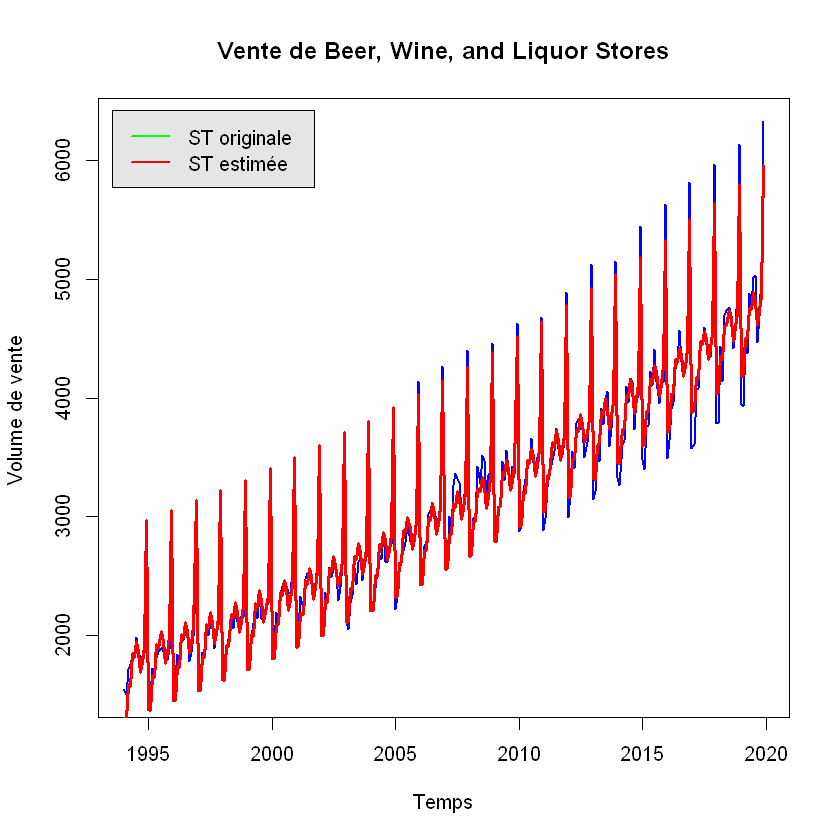

In [86]:
plot(sp.ts, xlab="Temps", ylab="Volume de vente ",
     main="Vente de Beer, Wine, and Liquor Stores",
     col="blue",lwd=2)
points(time(sp.ts),fitted(Model2),lwd=3,type="l",col="red")
legend("topleft", c("ST originale","ST estimée"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("green","red"))

## Modélisation de la composante stochastique (résiduelle)

### Représentation graphique de la composante résiduelle 

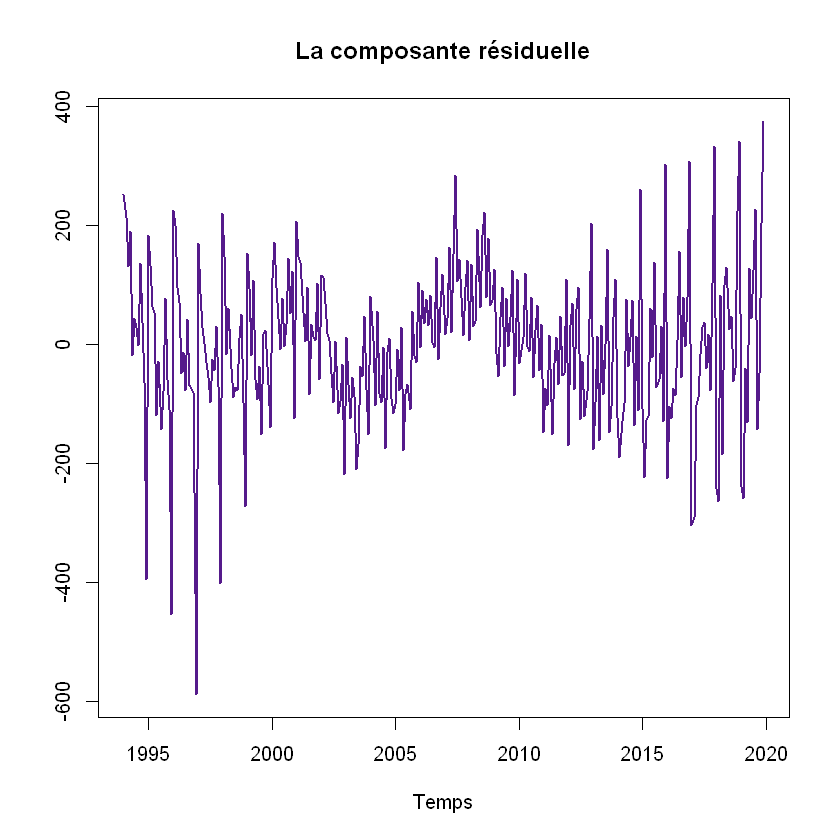

In [87]:
sp.res<-Model3$residuals
plot(time(sp.ts),sp.res, xlab="Temps", ylab="",
     main="La composante résiduelle",
     col="purple4",lwd=2,type="l")

### Test de stasionnarité  
Pour pouvoir modéliser les résidus par un modèle ARMA, il faut s'assurer de leur stationnarité. Pour ce faire, on utilisera le test de Augmented Dickey Fuller `adf.test()` sous le package  `tseries`. Si :  

 1. La stationnarité est assurée alors :  
     a. Si les résidus correspondent à un bruit blanc, c'est gagné! ***Le modèle est parfait !***  
     b. Si les résidus ne coresspondent pas à un bruit blanc, on passe à la modélisation par un modèle ARMA.  
 
2. La stationnarité n'est pas assurée alors on applique des différentiations autant de fois que nécessaire pour stationnariser la série et revenir au premier point.

In [88]:
library(tseries)
adf.test(sp.res)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -15.54    0.01
[2,]   1 -11.65    0.01
[3,]   2  -8.72    0.01
[4,]   3  -8.25    0.01
[5,]   4  -5.86    0.01
[6,]   5  -5.16    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -15.51    0.01
[2,]   1 -11.63    0.01
[3,]   2  -8.71    0.01
[4,]   3  -8.24    0.01
[5,]   4  -5.86    0.01
[6,]   5  -5.15    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -15.48    0.01
[2,]   1 -11.61    0.01
[3,]   2  -8.69    0.01
[4,]   3  -8.23    0.01
[5,]   4  -5.85    0.01
[6,]   5  -5.15    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


La p_value <0.05 donc on accepte l'hypothèse alternative : les données différenciées sont stationnaire.

### Test de blancheur : `Box.test()`
On teste si la nouvelle variable `sp.res` est bien un bruit blanc ou pas. Pour ce faire, on peut procéder de deux façons différentes :  
  
1. Tracer l'acf et vérifier l'absence d'autocorrélation.  
  
2. Appliquer le test de Box-Pierce via la commande `Box.test()`.


	Box-Pierce test

data:  sp.res
X-squared = 4.0122, df = 1, p-value = 0.04517


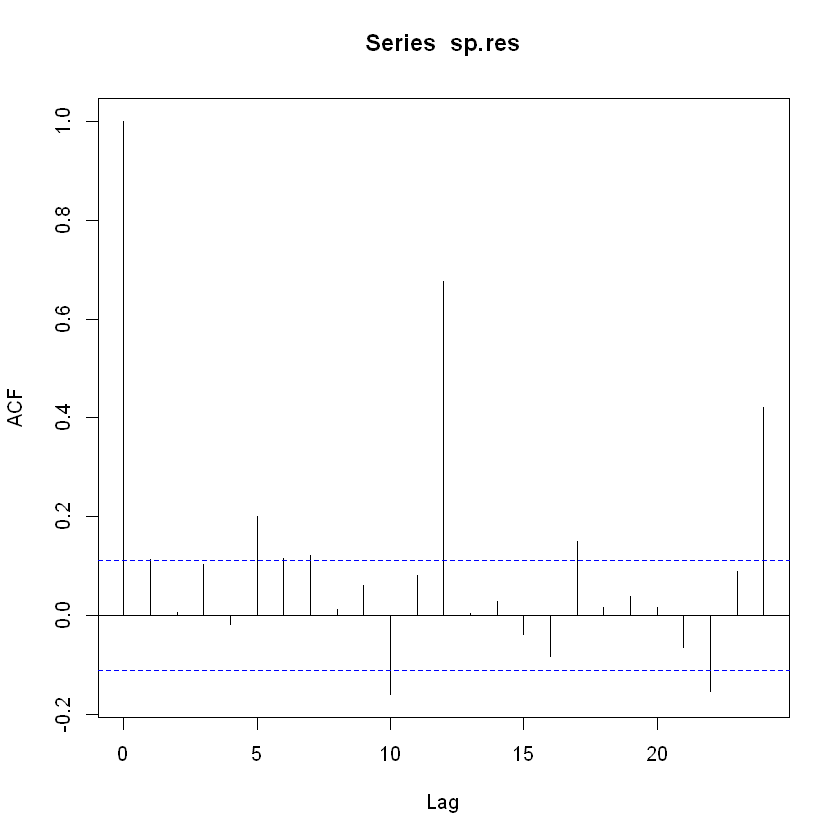

In [89]:
acf(sp.res)
Box.test(sp.res)

L'acf indique bien la présence d'autocorrélation et le test de Box-Pierce indique également à travers la valeurs de la p_value<0.05 que l'hypothèse alternative est considérée : le bruit n'est pas blanc.  
  
Il faut passer maintenant à modéliser les données stationnaires résultatntes par un modèle ARMA.  

### Modèle ARMA pour la composante résiduelle différenciée  
Pour avoir une idée sur l'ordre $p$ du modèle AR et l'ordre $q$ de celui de MA, on trace l'acf et la pacf des données résiduelles différenciées.

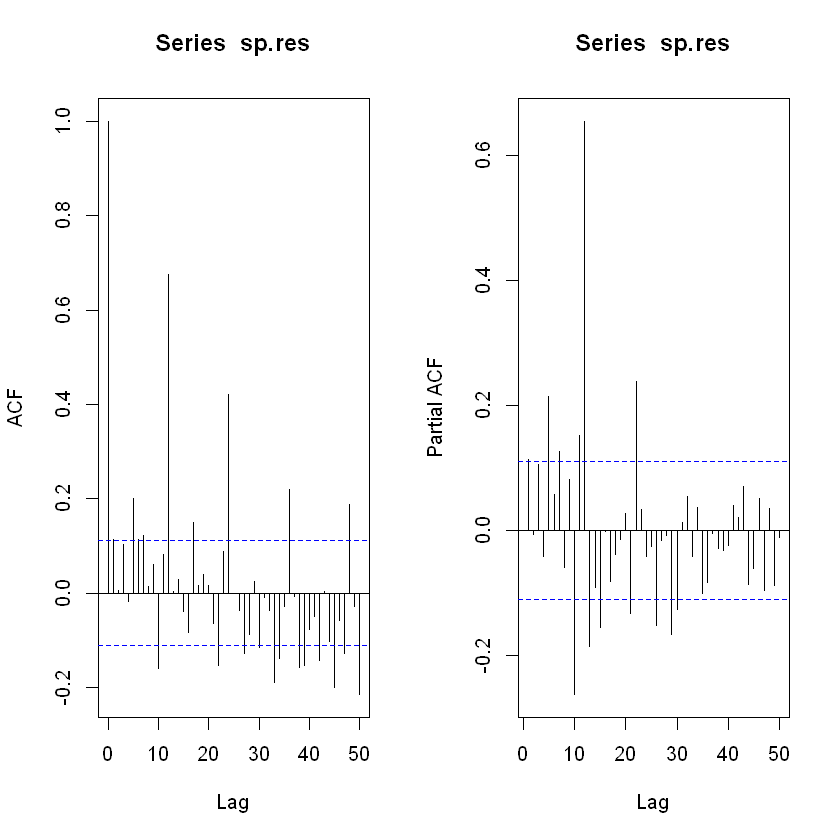

In [90]:
par(mfrow=c(1,2))
acf(sp.res,50)
pacf(sp.res,50)

On voit bien que c'est difficile de déterminer $p$ et $q$ à partir des tracés de l'acf et la pacf. On pourra utilisé la fonction `auto.arima()`du package `forecast`.

In [91]:
library(forecast)
ARMA=auto.arima(sp.res)
ARMA

Series: sp.res 
ARIMA(3,0,5) with zero mean 

Coefficients:
         ar1      ar2     ar3      ma1     ma2      ma3     ma4     ma5
      0.1763  -0.3548  0.1104  -0.0469  0.4321  -0.0095  0.0700  0.5842
s.e.  0.0930   0.0726  0.0851   0.0766  0.0519   0.0701  0.0563  0.0593

sigma^2 estimated as 13136:  log likelihood=-1919.68
AIC=3857.37   AICc=3857.97   BIC=3891.06

Le résultat de la fonction `auto.arima()` nous donne que le bon modèle à considérer est un ARMA(3,0,5). Donnons ce modèle.

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -17.32    0.01
[2,]   1 -12.87    0.01
[3,]   2 -10.64    0.01
[4,]   3 -10.28    0.01
[5,]   4  -9.71    0.01
[6,]   5  -7.92    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -17.29    0.01
[2,]   1 -12.86    0.01
[3,]   2 -10.63    0.01
[4,]   3 -10.27    0.01
[5,]   4  -9.70    0.01
[6,]   5  -7.91    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -17.27    0.01
[2,]   1 -12.84    0.01
[3,]   2 -10.62    0.01
[4,]   3 -10.27    0.01
[5,]   4  -9.70    0.01
[6,]   5  -7.92    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


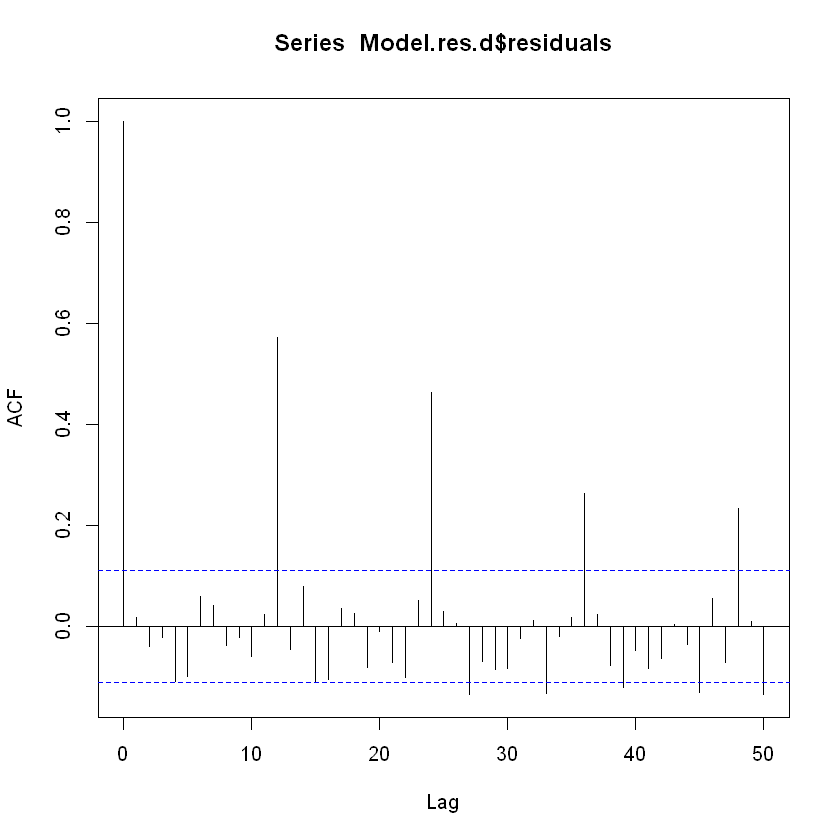

In [92]:
#arima(l.p, order = c(3:p, 0:d, 5:q),seasonal = list(order = c(3p,0,5q), period = 12))
Model.res.d<-arima(sp.res,order = c(3, 0, 5))
adf.test(Model.res.d$residuals)
acf(Model.res.d$residuals,50)

On voit que la composante aléatoire du modèle ARMA est stationnaire mais elle n'est pas un bruit blanc. On a une autocorrélation saisonnière. On fera appel à un modèle SARIMA pour tenir en considération de cette saisonnalité.

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -17.34    0.01
[2,]   1 -12.10    0.01
[3,]   2 -10.03    0.01
[4,]   3  -8.72    0.01
[5,]   4  -6.84    0.01
[6,]   5  -6.61    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -17.33    0.01
[2,]   1 -12.10    0.01
[3,]   2 -10.03    0.01
[4,]   3  -8.72    0.01
[5,]   4  -6.83    0.01
[6,]   5  -6.61    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -17.35    0.01
[2,]   1 -12.14    0.01
[3,]   2 -10.08    0.01
[4,]   3  -8.79    0.01
[5,]   4  -6.89    0.01
[6,]   5  -6.66    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


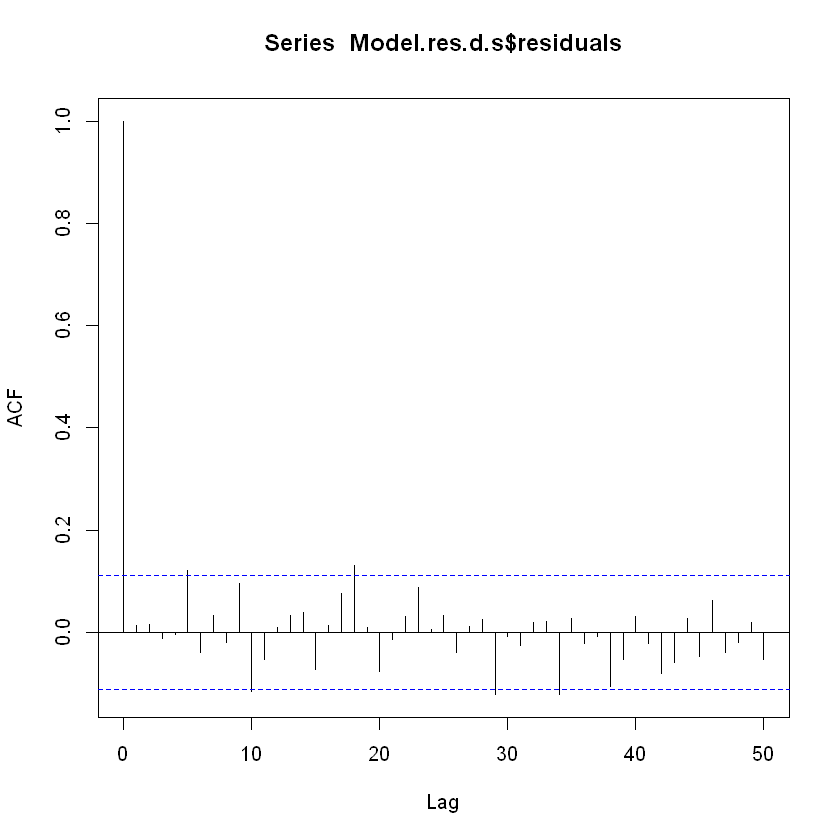

In [93]:
Model.res.d.s<-arima(sp.res, order = c(3, 0, 5),seasonal = list(order = c(3,0,5), period = 12))
adf.test(Model.res.d.s$residuals)
acf(Model.res.d.s$residuals,50)

### Pour une meilleure interprétation des résultats

Warning message:
"package 'aTSA' is in use and will not be installed"

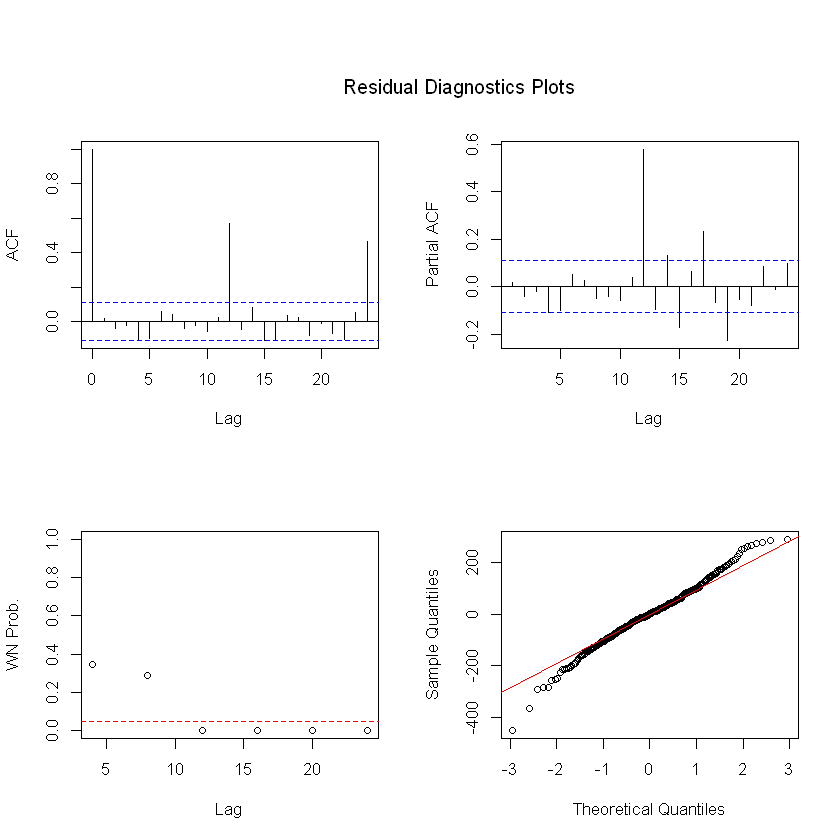

In [94]:
install.packages("aTSA")
library(aTSA)
ts.diag(Model.res.d)

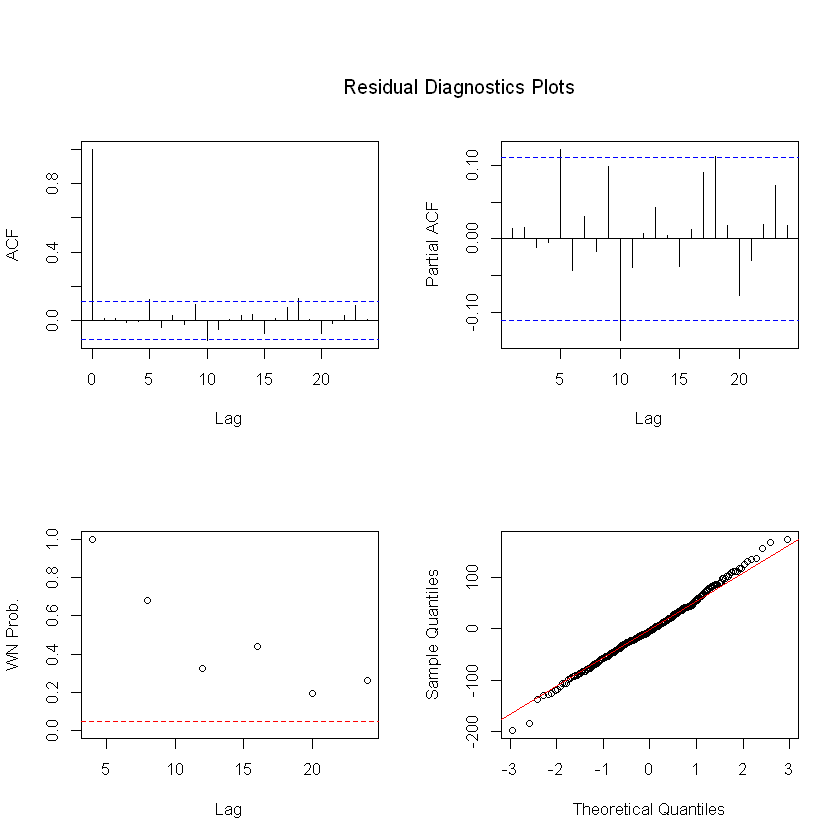

In [95]:
library(aTSA)
ts.diag(Model.res.d.s)